# Nueral Network and CNN and RNN, Drop out Methods and LEnet% Practice

Due 04/18 23:59 

### Name: Vipul H Harihar
### Uni: vhh2105

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras import layers
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import pprint 
pp = pprint.PrettyPrinter(indent=4)


# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

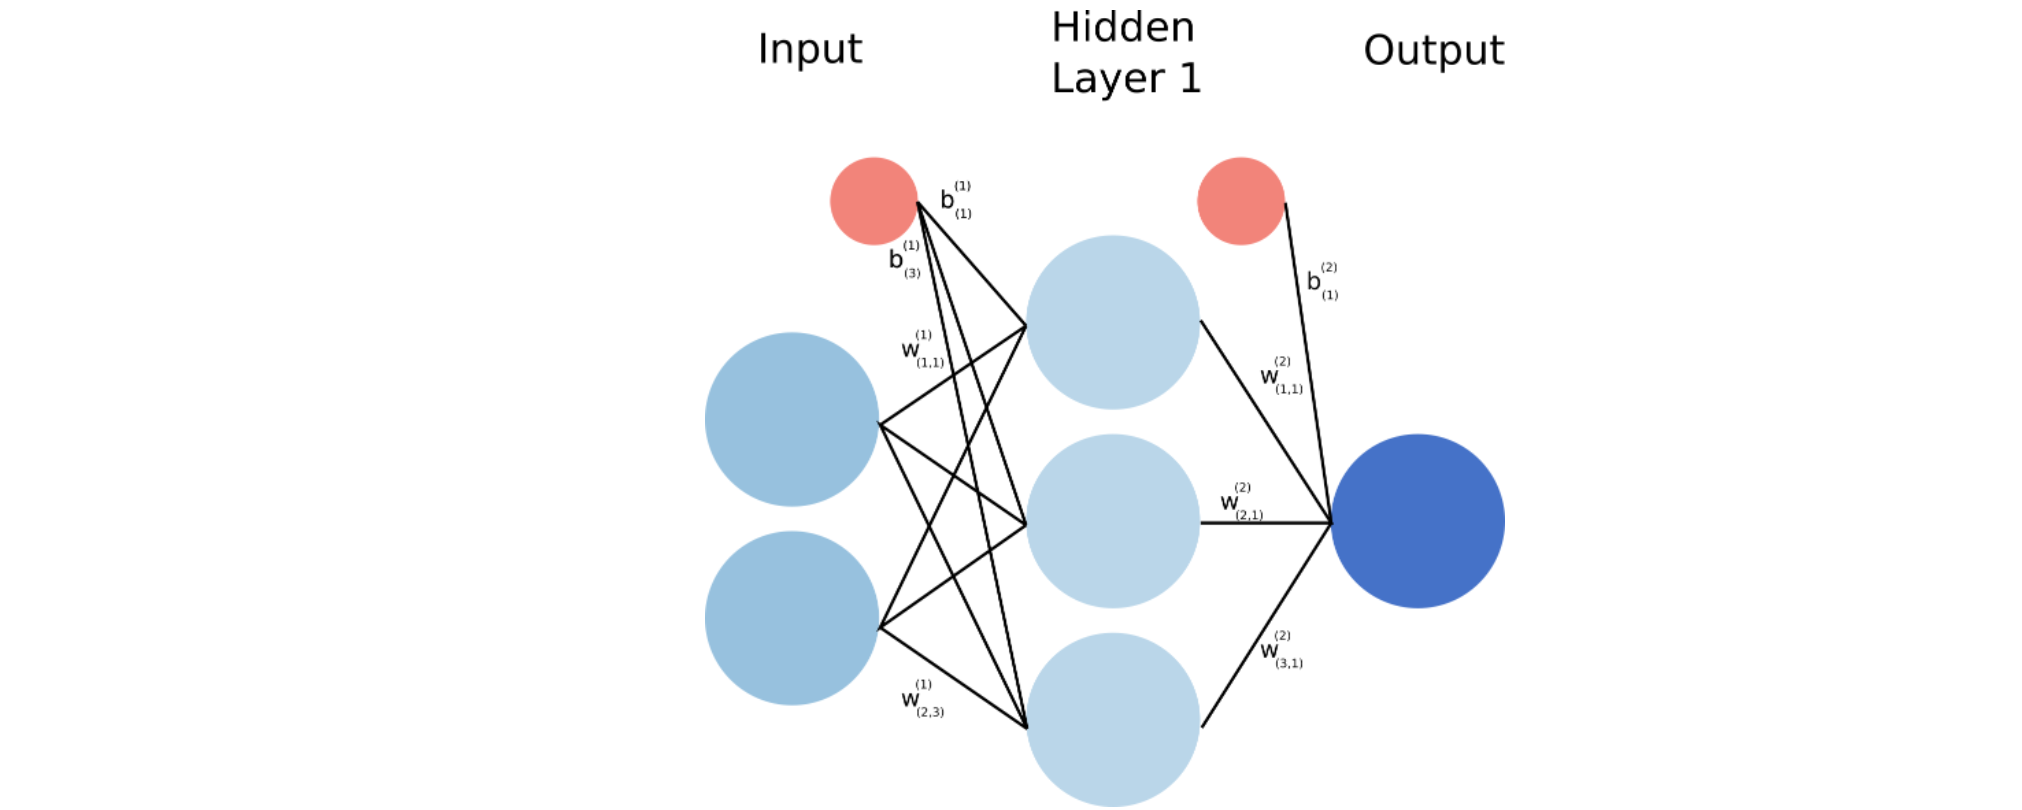

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [3]:
np.random.seed(0) # don't change this
weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [6]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation implementation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation implementation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.sum(dLdZ2)
    

    dLdH = np.multiply(dLdZ2.reshape((1000,1)), weights['W2'].reshape((3, 1)).T)
    dLdZ1 = np.multiply(dLdH, sigmoid(Z1)*(1-sigmoid(Z1)))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.sum(dLdZ1, axis = 0).T
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [7]:
gradients, L = back_propagation(X, Y, weights)


In [8]:
print("Loss is given here:",L)
print("My found Gradients:")
pp.pprint(gradients)

Loss is given here: 0.1332476222330792
My found Gradients:
{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [79]:
from tensorflow.keras.datasets import fashion_mnist
# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axs for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

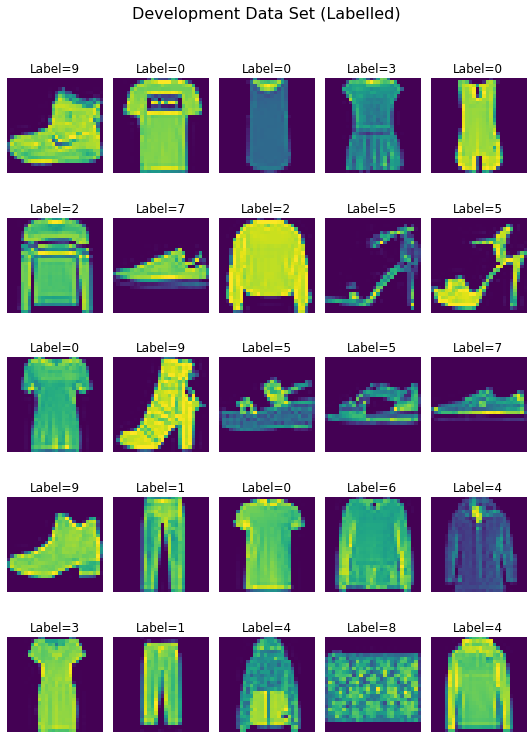

In [80]:
import matplotlib.pyplot as plt
numRows = 5
numCols = 5

fig, axs = plt.subplots(numRows, numCols, figsize=(1.5*numCols,2*numRows))
for i in range(25):
    ax = axs[i//numCols, i%numCols]
    ax.imshow(xdev[i])
    ax.set_title('Label={}'.format(ydev[i]))
    ax.axis("off")
plt.tight_layout()
fig.suptitle("Development Data Set (Labelled)",y=1.05,size=16)
plt.show()

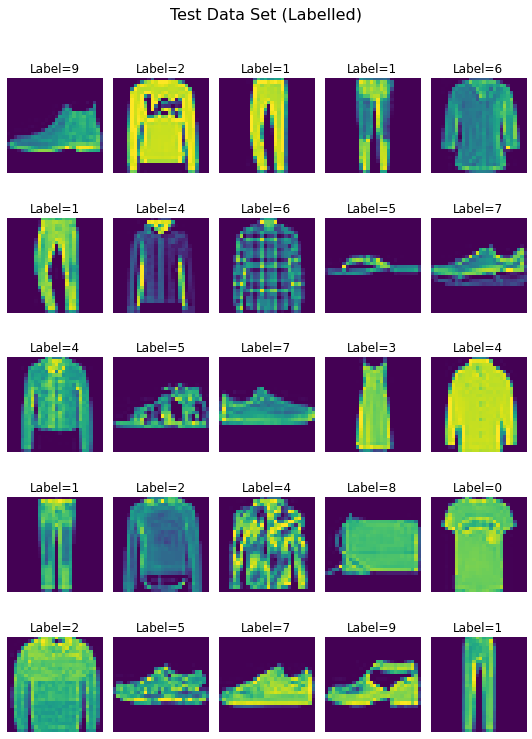

In [81]:
numRows = 5
numCols = 5

fig, axs = plt.subplots(numRows, numCols, figsize=(1.5*numCols,2*numRows))
for i in range(25):
    ax = axs[i//numCols, i%numCols]
    ax.imshow(xtest[i])
    ax.set_title('Label={}'.format(ytest[i]))
    ax.axis("off")
plt.tight_layout()
fig.suptitle("Test Data Set (Labelled)", y=1.05,size=16)
plt.show()

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [82]:
print('Shape xdev=', xdev.shape)
print('Shape ydev=', ydev.shape)
print('Shape xtest=', xtest.shape)
print('Shape ytest=', ytest.shape)

Shape xdev= (60000, 28, 28)
Shape ydev= (60000,)
Shape xtest= (10000, 28, 28)
Shape ytest= (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [83]:
xdev = np.reshape(xdev, (xdev.shape[0], xdev.shape[1]*xdev.shape[2]))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1]*xtest.shape[2]))


In [84]:
print("Flatten the images into one-dimensional vectors:")
print('Shape xdev:', xdev.shape)
print('Shape xtest:', xtest.shape)

Flatten the images into one-dimensional vectors:
Shape xdev: (60000, 784)
Shape xtest: (10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [85]:
xdev = xdev/255.0 

xtest = xtest/255.0

In [86]:
print("Shape xdev=",xdev.shape)
print("Values of ydev=",ydev)
print("Values of ytest=",ytest)

Shape xdev= (60000, 784)
Values of ydev= [9 0 0 ... 3 0 5]
Values of ytest= [9 2 1 ... 8 1 5]


### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 3.2.1 and. 3.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


In [87]:
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

numClasses = 10
ydev = np_utils.to_categorical(ydev, numClasses)
ytest = np_utils.to_categorical(ytest, numClasses)

We are using to_categorial function from keras.utils and I would suggest that target variable encoding i.e One-hot encoding works best for this model as clearly the activation function softmax produces the probability of input being in a class which either would give the answer in (0,1).
I find the 3.2.1 and 3.2.5 also support the relevant argument been discussed here

### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [88]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(xdev, ydev, test_size=0.2, random_state=42)

### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [89]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model_1= Sequential([ Dense(128, input_shape=(784,)), Activation('relu'), Dense(64), Activation('relu'),Dense(10), Activation('softmax')])

### 3.2.2 Print out the model summary

**Here I will print the model summary**

In [90]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-tr

### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

**Ans)** The total number of trainable parameters  109,386 in number while concerning this number is dependent on the image height and width my answer is "Yes"

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [91]:
predictions = model_1.predict(X_train[:1])
print("Ouput Prediction of Model=", round(predictions.sum(),2))
print("The Shape of Prediction:", predictions.shape)


Ouput Prediction of Model= 1.0
The Shape of Prediction: (1, 10)


### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

In [92]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Answer)** When I saw the model_1 output and the overall objective:-

I thought of using the the loss function to be the Adam Optimizer because Adam Optimizer is popular replacement optimization algorithm for the deep learning models training in stochastic gradient descent .  

This optimizer is having its own advantages as discussed in the lectures. It was also observed that Adam Optimizer have reuires computation time and is fast, and nevertheless it does not require many parameters for tuning. As learned more deeper levels statistically the parameter magnitudes upgrades occuring are not changing are not changing to the gradient rescaling and more luikely its stepsizes are bounded by the hyperparameter's stepsize. In simpler terms it it does not require prominent objective stationary,allowing it perform easily with sparse gradients, and step size annealing. This all argument incurs to say that it is good for the data we are considering to train at the moment.

The chosen loss= "categorical crossentropy loss" as it is relevant for multi-classes which are mutually exclusive in a problem

The metrics I considered for the model_1 compile= accuracy as the we are quite known to be using the multi-classification problem according to the problem. And these all will help us in getting better model and understanding its performances.

### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [93]:
history = model_1.fit(X_train, y_train,
    epochs=20, 
    validation_data= (X_val, y_val), 
    batch_size=128, 
    verbose = 1
                   )

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.5692 - accuracy: 0.8009 - val_loss: 0.4367 - val_accuracy: 0.8450
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4065 - accuracy: 0.8556 - val_loss: 0.4003 - val_accuracy: 0.8585
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8722 - val_loss: 0.3734 - val_accuracy: 0.8630
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8811 - val_loss: 0.3574 - val_accuracy: 0.8699
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.8853 - val_loss: 0.3356 - val_accuracy: 0.8786
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2909 - accuracy: 0.8929 - val_loss: 0.3394 - val_accuracy: 0.8801
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2824 - accuracy: 0.8960 - val_loss: 0.3181 - val_accuracy: 0.8832
Epoch 

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

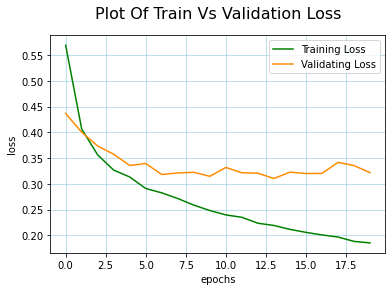

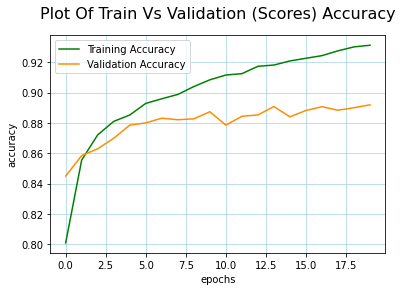

In [94]:
plt.plot(history.epoch, history.history['loss'],color="green", label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], color="darkorange",label='Validating Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(color="lightblue")
plt.title("Plot Of Train Vs Validation Loss",size=16,y=1.05)
plt.show()

plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy',color="green")
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy',color="darkorange")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(color="lightblue")
plt.title('Plot Of Train Vs Validation (Scores) Accuracy',size=16,y=1.05)
plt.legend()
plt.show()

### 3.3.1 Report metric score on test set

In [95]:
score = model_1.evaluate(X_val, y_val, verbose = 1)
print('The Test Loss=', round(score[0],3))
print('The Accuracy of the Model on Test dataset=', round(score[1]*100,2),"%")

375/375 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.8920
The Test Loss= 0.322
The Accuracy of the Model on Test dataset= 89.2 %


### 3.3.2 Plot confusion matrix on the test set and label the axs appropriately with true and predicted labels. 

Labels on the axs should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

xPredictions = model_1.predict(xtest) 
class_xs = np.argmax(xPredictions, axis=1)
class_ys = np.argmax(ytest, axis=1)
conf_mat = confusion_matrix(class_ys,class_xs)

<Figure size 1080x1080 with 0 Axes>

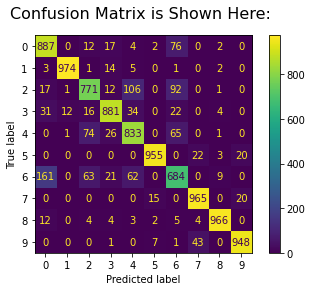

In [97]:


plt.figure(figsize=(15,15))
matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
matrix_display.plot()
plt.title("Confusion Matrix is Shown Here: ",size=16,y=1.05)
plt.show()

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axs for a nicer presentation.

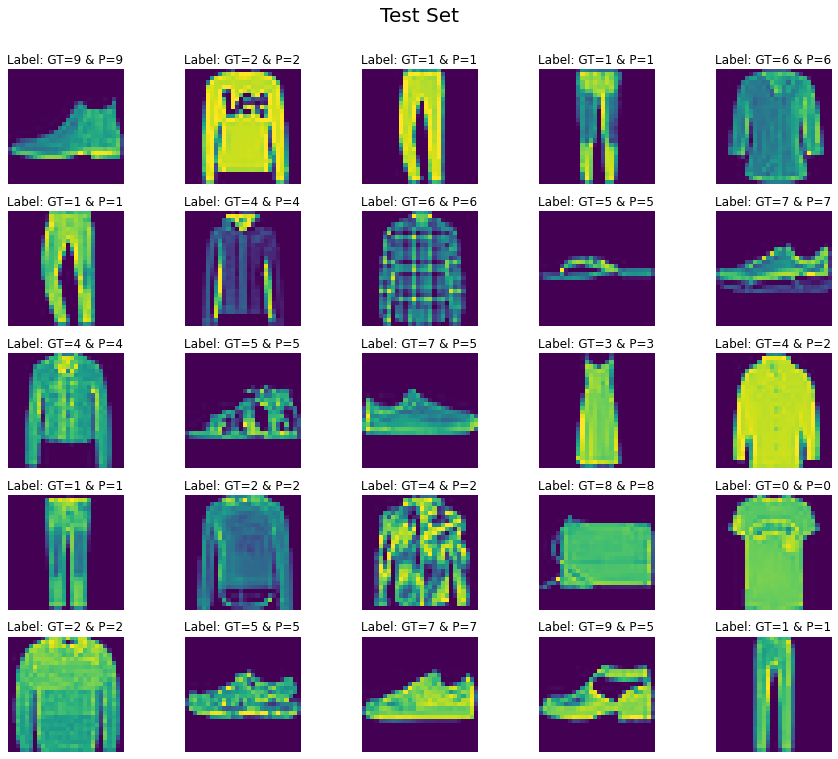

In [98]:
numRows = 5
numCols = 5

fig, axs = plt.subplots(numRows, numCols, figsize=(2.5*numCols,2*numRows))
for i in range(25):
    ax = axs[i//numCols, i%numCols]
    ax.imshow(xtest[i].reshape((28,-1)))
    title = f"GT={class_ys[i]} & P={np.argmax(xPredictions[i,:])}"
    ax.set_title('Label: {}'.format(title))
    ax.axis("off")
plt.tight_layout()
fig.suptitle("Test Set", size= 20, y=1.05)
plt.show()

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [99]:
from tensorflow.keras.datasets import fashion_mnist

# loading data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [100]:
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
# TODO: Standardization of the dataset done here
xdev = xdev/255.0 
xtest = xtest/255.0

# TODO: Encode the target labels done here

numClasses = 10
ydev = np_utils.to_categorical(ydev, numClasses)
ytest = np_utils.to_categorical(ytest, numClasses)
# Splitting again

X_train, X_val, y_train, y_val = train_test_split(xdev, ydev, test_size=0.2, random_state=42)

### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [101]:
model_2= keras.Sequential()
model_2.add(layers.Conv2D(filters=6, strides=1, padding='same', kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model_2.add(layers.MaxPooling2D(pool_size=2))

model_2.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model_2.add(layers.Flatten())

# My Fully Connected Layer:-
model_2.add(layers.Dense(units=84, activation='relu'))
model_2.add(layers.Dense(units=10, activation = 'softmax'))

### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

**Ans)** The Le-Net 5 Model Summary is displayed below:



In [103]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_3 (Flatten)         (None, 120)              

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [104]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, y_train,
    epochs=10, validation_data= (X_val, y_val), batch_size=128, verbose = 1)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6977 - accuracy: 0.7445 - val_loss: 0.4974 - val_accuracy: 0.8187
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4449 - accuracy: 0.8395 - val_loss: 0.4167 - val_accuracy: 0.8508
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3860 - accuracy: 0.8606 - val_loss: 0.3764 - val_accuracy: 0.8587
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3472 - accuracy: 0.8743 - val_loss: 0.3347 - val_accuracy: 0.8795
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3191 - accuracy: 0.8843 - val_loss: 0.3281 - val_accuracy: 0.8834
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3028 - accuracy: 0.8897 - val_loss: 0.3178 - val_accuracy: 0.8858
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2863 - accuracy: 0.8965 - val_loss: 0.3035 - val_accuracy: 0.8901
Epoch 

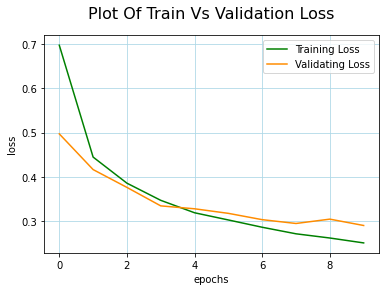

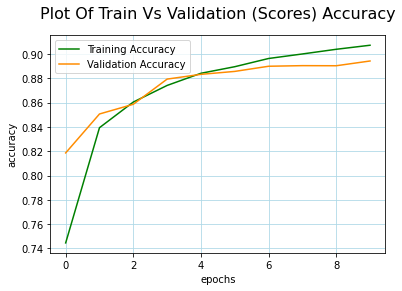

In [105]:
plt.plot(history.epoch, history.history['loss'],color="green", label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], color="darkorange",label='Validating Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(color="lightblue")
plt.legend()
plt.title("Plot Of Train Vs Validation Loss",size=16,y=1.05)
plt.show()

plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy',color="green")
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy',color="darkorange")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(color="lightblue")
plt.title('Plot Of Train Vs Validation (Scores) Accuracy',size=16,y=1.05)
plt.legend()
plt.show()

In [76]:
# TODO: Report model performance on test set
score = model_2.evaluate(X_val, y_val, verbose = 2)
print('The Test Loss is:', round(score[0],3))
print('The accuracy of Test dataset', round(score[1]*100,2),"%")

375/375 - 1s - loss: 0.2798 - accuracy: 0.8979 - 872ms/epoch - 2ms/step
The Test Loss is: 0.28
The accuracy of Test dataset 89.79 %


**What do you see from the plots?**
**Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

**Ans)**

The two plots are quite interesting in themselves. 

**The Loss Plot:**
On observing the validation loss < training loss initially upto 3.7 epoch mark but after that point the reverse happens training loss becomes less than validation loss.

**The Accuracy Plot:**
The accuracy od the model on training seems to criss cross the training model line which is a clear indication of variablity in the dataset in the graph of Accuracy. This also suggests that there have been overfitting in the data model we created.

We see "Overfitting" in the plots from the above discussed observations. The more concrete proof of the overfitting is the curves criss crossing and Validation loss being  < Testing Loss on the specific epochs. Thus it suggests that Offerfitting of the model exists.

These above mentioned things are also the signs for this overfitting suggestions.The techniques to combat **Overfitting** are:


*   **Data Augmentation:** If the size of the training data set is rised it might help in reducing the overfitting by using the following techniques like applying the following techniques on the images like:-
 
      * Flipping
      * Translation 
      * Rotation
      * Scaling 
      * Adding noise 
      * Changing brightness 
   
*   **Regularization:**
Regularization technique is also popular in reducing the complexity of the model similar to simpliying the nueral network. While Training it is done by adding a penalty term to the loss function.The most common techniques are known as L1 and L2 regularization:
    * The L1 penalty aims to minimize weights absolute value
    * The L2 penalty aims to minimize the squared magnitude of the weights. 
   
    L1 is better if simple data is to be modelled. Generally Professor told that in Computer Vision Problems, L2 regularization almost always gives better results. But Actual; regularization does depend on the type of problemn we are dealing with,

*   **Implementations of Dropouts:** Dropout forbids the neural networks to go under overfitting. Dropout Implementation modify the network itself. During training this method tends to randomly drops neurons from the neural network  in every iteration. Dropping different sets of neurons is alomost equivalent to training totally different neural networks.

*   **Model Simplifying:**  Decreasing the complexity of the model also combats "Overfitting", we can simply remove layers and in more simpler approach reduce the nuerons number and reduce the network size

*   **Usage of Early Stopping:** is regularization method used while training, in a model having iterative method(gradient descent) Imagine as like all neural networks are exclusively being trained and learning iteractive method using gradient descent. Early stopping is a technique to stop the training as it realizes the overfitting ids happening beyond a point.

Thus these are the points and my thoughts on the plots, overfitting and its solution







### 4.2.4 Report metric score on test set

In [106]:
# TODO: Report model performance on test set
score = model_2.evaluate(X_val, y_val, verbose = 1)
print('The Test Loss of Model=', round(score[0],3))
print('The Model Accuracy on Test dataset=', round(score[1]*100,2),"%")

375/375 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.8944
The Test Loss of Model= 0.29
The Model Accuracy on Test dataset= 89.44 %


### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [115]:
# TODO: build the model with drop-out layers
model_3= keras.Sequential()

model_3.add(layers.Conv2D(filters=6, strides=1, padding='same', kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.MaxPooling2D(pool_size=2))

model_3.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Flatten())

model_3.add(layers.Dense(units=84, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(units=10, activation = 'softmax'))

In [116]:
# TODO: train the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, y_train,
    epochs=15, validation_data= (X_val, y_val), batch_size=128, verbose = 1)

Epoch 1/15
375/375 [==============================] - 3s 5ms/step - loss: 0.9685 - accuracy: 0.6502 - val_loss: 0.8174 - val_accuracy: 0.7854
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.6249 - accuracy: 0.7732 - val_loss: 0.6506 - val_accuracy: 0.8259
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.5487 - accuracy: 0.8030 - val_loss: 0.5903 - val_accuracy: 0.8400
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.5152 - accuracy: 0.8173 - val_loss: 0.5505 - val_accuracy: 0.8549
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4846 - accuracy: 0.8268 - val_loss: 0.5041 - val_accuracy: 0.8628
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4678 - accuracy: 0.8346 - val_loss: 0.4862 - val_accuracy: 0.8644
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4547 - accuracy: 0.8385 - val_loss: 0.4577 - val_accuracy: 0.8703
Epoch 

In [117]:
# TODO: Report model performance on test set
score = model_3.evaluate(X_val, y_val, verbose = 0)
print('The Test Loss is:', round(score[0],3))
print('The accuracy of Test dataset', round(score[1]*100,2),"%")


The Test Loss is: 0.373
The accuracy of Test dataset 87.42 %


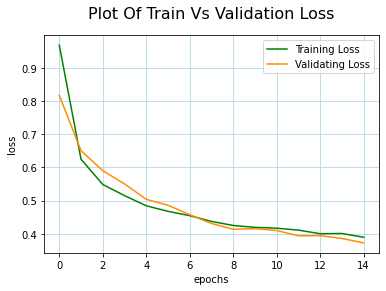

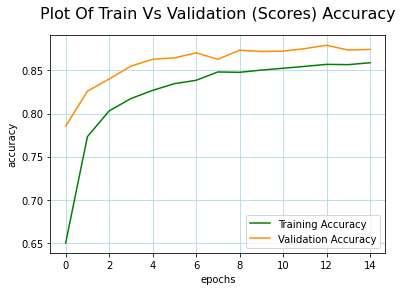

In [118]:
# TODO: plot 
plt.plot(history.epoch, history.history['loss'],color="green", label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], color="darkorange",label='Validating Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(color="lightblue")
plt.title("Plot Of Train Vs Validation Loss",size=16,y=1.05)
plt.show()

plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy',color="green")
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy',color="darkorange")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(color="lightblue")
plt.title('Plot Of Train Vs Validation (Scores) Accuracy',size=16,y=1.05)
plt.legend()
plt.show()

**What's your observation?**

> NOTE: All machines are different and have different Processing power my observations are basd ont he results that I am seeing on my machine, they are highly likely to differ with any other machine results

On observing the plots and seeing the computed values we see that:-

The Test Loss of Drop Out Model is: 0.373

The Accuracy of Test dataset on DropOut Model is: 87.42 %

The Test Loss of Previous Model= 0.29

The Model Accuracy of previous model on Test dataset= 89.44 %

After the implementation of the Drop Out Model the 
Loss Value has changed to 0.373 which was 0.29 in the previous while the initial loss in previous model was 0.29. Clearly the loss has increased.
Similarly the accuracyof the model has degraded it was 89.44 % but after the drop out method implementation of model on the test data it has dropped to 87.64 %
Thus this is my observation.

In [121]:
score = model_2.evaluate(X_val, y_val, verbose = 1)
print('The Test Loss of Previous Model=', round(score[0],3))
print('The Model Accuracy of previous model on Test dataset=', round(score[1]*100,2),"%")

375/375 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.8944
The Test Loss of Previous Model= 0.29
The Model Accuracy of previous model on Test dataset= 89.44 %


% 

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [122]:
# TODO: build the model with batch normalization layers
model_4= keras.Sequential()

model_4.add(layers.Conv2D(filters=6, strides=1, padding='same', kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model_4.add(layers.BatchNormalization())
model_4.add(layers.MaxPooling2D(pool_size=2))

model_4.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_4.add(layers.BatchNormalization())
model_4.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_4.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Flatten())
model_4.add(layers.Dense(units=84, activation='relu'))

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=10, activation = 'softmax'))

In [123]:
# TODO: train the model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_4.fit(X_train, y_train,
    epochs=15, validation_data= (X_val, y_val), batch_size=128, verbose = 1)

Epoch 1/15
375/375 [==============================] - 3s 6ms/step - loss: 0.4271 - accuracy: 0.8481 - val_loss: 0.6048 - val_accuracy: 0.7845
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2906 - accuracy: 0.8937 - val_loss: 0.3245 - val_accuracy: 0.8846
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2544 - accuracy: 0.9062 - val_loss: 0.2745 - val_accuracy: 0.9005
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2301 - accuracy: 0.9142 - val_loss: 0.2790 - val_accuracy: 0.8980
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2106 - accuracy: 0.9200 - val_loss: 0.2756 - val_accuracy: 0.8980
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1959 - accuracy: 0.9264 - val_loss: 0.2849 - val_accuracy: 0.8972
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1808 - accuracy: 0.9323 - val_loss: 0.4169 - val_accuracy: 0.8605
Epoch 

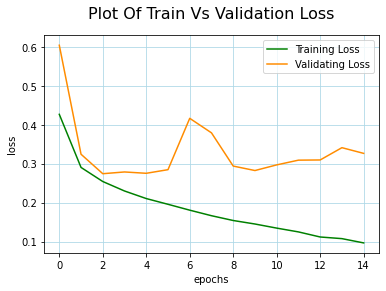

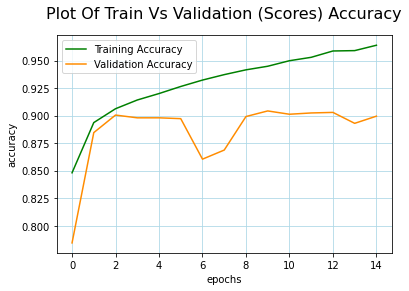

In [124]:
# TODO: plot
plt.plot(history.epoch, history.history['loss'],color="green", label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], color="darkorange",label='Validating Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(color="lightblue")
plt.title("Plot Of Train Vs Validation Loss",size=16,y=1.05)
plt.show()

plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy',color="green")
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy',color="darkorange")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(color="lightblue")
plt.title('Plot Of Train Vs Validation (Scores) Accuracy',size=16,y=1.05)
plt.legend()
plt.show()

In [125]:
# TODO: Report model performance on test setscore = model_4.evaluate(X_val, y_val, verbose = 0)
score = model_4.evaluate(X_val, y_val, verbose = 1)
print('The Test Loss is:', round(score[0],3))
print('The accuracy of Test dataset', round(score[1]*100,2),"%")

375/375 [==============================] - 1s 3ms/step - loss: 0.3268 - accuracy: 0.8995
The Test Loss is: 0.327
The accuracy of Test dataset 89.95 %



> NOTE: All machines are different and have different Processing power my observations are basd ont he results that I am seeing on my machine, they are highly likely to differ with any other machine results



**Observation, comparison with Dropout:**

Batch Normalization is among the popular regularization techniques, it is not as effective as the l1, l2, dropout regularizations but on adding the Batch Normalization in NN, we are able to decrease the instable (internal) covariate shift that occurs in the kind of data we are dealing with.
According to ***my Computations:***

* **Batch Normalization Model***

    The Test Loss on Batch Normalization is: 0.327 
 
    The Accuracy of Test dataset in this  Batch Normalized Model is: 89.95 %

* **Dropout Model***

  The Test Loss of Drop Out Model is: 0.373

  The Accuracy of Test dataset on DropOut Model is: 87.42 %

According to the observed and comapared metrics on Test Data I can conclude that the Batch Normalization in deeper networks reduces the effect of overfitting and works well as seen in my the plotted graphs also has proven to given me more accuracy than previous model as compared and given me less loss as observed as well.

---

**THANK YOU SO MUCH**

Respected Proffessor and TAs I always feared how to implement NN on images and understand how this specific model works. I am glad that you gave me this opportunity to make the perceptron from scratch and also allowed me to classify the images data, when I came to Columbia this was on my list to do and today I can gladly say that I have accompalished one the things I joined my Data Science Program for, thank you again. Wishing you great upcoming summer and healthy and happy lives.